##Breast Cancer Data Analysis


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('BRCA.csv')
df = data.copy()
pd.set_option('display.max_row',df.shape[0])
pd.set_option('display.max_column',df.shape[1]) 
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [8]:
df.memory_usage()

Index                  128
Patient_ID            2728
Age                   2728
Gender                2728
Protein1              2728
Protein2              2728
Protein3              2728
Protein4              2728
Tumour_Stage          2728
Histology             2728
ER status             2728
PR status             2728
HER2 status           2728
Surgery_type          2728
Date_of_Surgery       2728
Date_of_Last_Visit    2728
Patient_Status        2728
dtype: int64

In [9]:
df.mean()

Age         58.886228
Protein1    -0.029991
Protein2     0.946896
Protein3    -0.090204
Protein4     0.009819
dtype: float64

In [11]:
#skewness
df.skew()

Age         0.304134
Protein1   -0.613021
Protein2   -0.199158
Protein3    0.701104
Protein4   -0.469545
dtype: float64

In [32]:
df.var()

Age         167.993023
Protein1      0.317631
Protein2      0.831082
Protein3      0.342430
Protein4      0.395710
dtype: float64

In [12]:
df.kurtosis()

Age        -0.541175
Protein1    1.356718
Protein2   -0.618643
Protein3    0.711461
Protein4    0.264222
dtype: float64

In [30]:
#check for duplicates
df.duplicated().sum()

6

In [13]:
df.corr()

,Age,Protein1,Protein2,Protein3,Protein4
Age,1.000000,-0.050638,-0.021542,-0.039686,0.094214
Protein1,-0.050638,1.000000,0.238141,-0.129482,0.280343
Protein2,-0.021542,0.238141,1.000000,-0.415825,0.088239
Protein3,-0.039686,-0.129482,-0.415825,1.000000,0.065316
Protein4,0.094214,0.280343,0.088239,0.065316,1.000000


In [31]:
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

Date_of_Last_Visit    7.038123
Patient_Status        5.865103
Date_of_Surgery       2.052786
Surgery_type          2.052786
HER2 status           2.052786
PR status             2.052786
ER status             2.052786
Histology             2.052786
Tumour_Stage          2.052786
Protein4              2.052786
Protein3              2.052786
Protein2              2.052786
Protein1              2.052786
Gender                2.052786
Age                   2.052786
Patient_ID            2.052786
dtype: float64

In [29]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Date_of_Last_Visit,24,7.0
Patient_Status,20,5.9
Date_of_Surgery,7,2.1
Surgery_type,7,2.1
HER2 status,7,2.1


<AxesSubplot:>

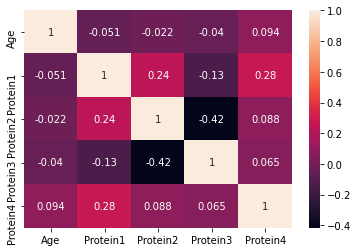

In [14]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Age', ylabel='Protein4'>

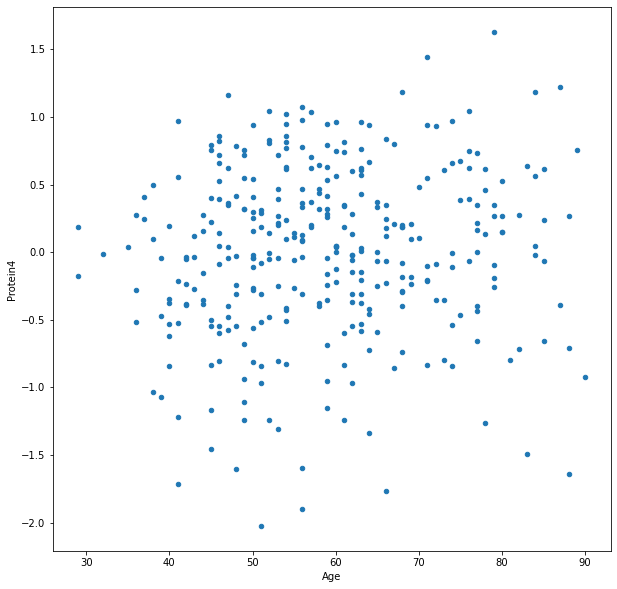

In [18]:
df.plot.scatter('Age','Protein4',figsize=(10,10))

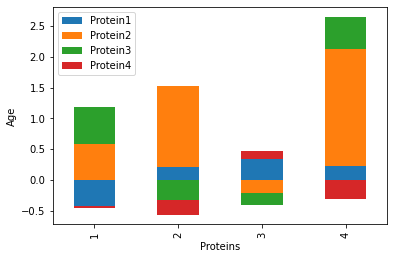

In [26]:
ax = df[['Protein1', 'Protein2','Protein3','Protein4']][1:5].plot.bar(stacked=True)

ax.set_xlabel("Proteins")
ax.set_ylabel("Age");

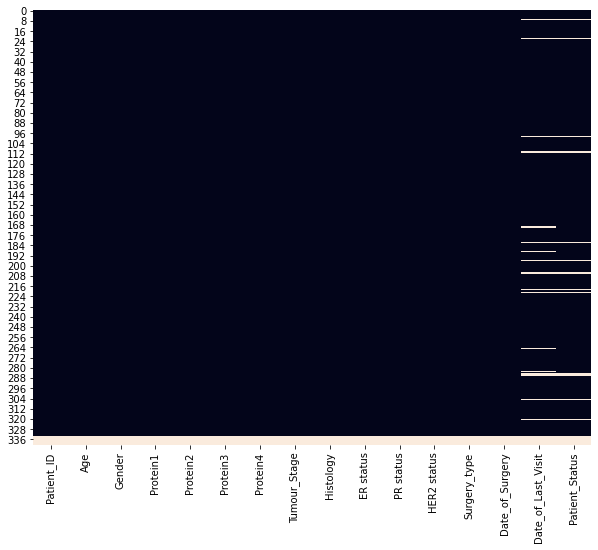

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isna(),cbar=False)
plt.show()

In [33]:
df.loc[df.duplicated(keep=False),:]

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df.drop_duplicates(keep='first',inplace=True)
df.shape

(335, 16)

In [36]:
#Target Distribution
df = data.copy()
df = df.drop(['Patient_ID','Date_of_Surgery','Date_of_Last_Visit'],axis=1)
df['Patient_Status'].value_counts(normalize=True) 

Alive    0.794393
Dead     0.205607
Name: Patient_Status, dtype: float64

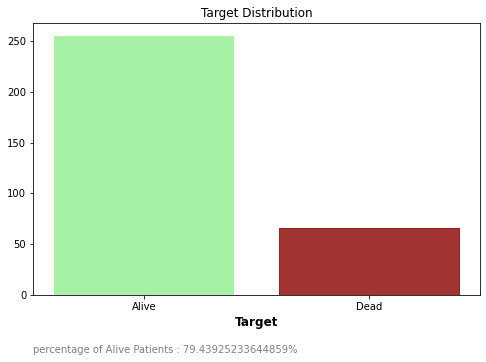

In [37]:
target_dist = df['Patient_Status'].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(8,5))

barplot = plt.bar(target_dist.index, target_dist, color = 'lightgreen', alpha = 0.8)
barplot[1].set_color('darkred')

ax.set_title('Target Distribution')
percentage = df['Patient_Status'].value_counts(normalize=True)[0]*100
ax.annotate("percentage of Alive Patients : {}%".format(percentage),
              xy=(0, 0),xycoords='axes fraction', 
              xytext=(0,-50), textcoords='offset points',
              va="top", ha="left", color='grey',
              bbox=dict(boxstyle='round', fc="w", ec='w'))

plt.xlabel('Target', fontsize = 12, weight = 'bold')
plt.show()

In [38]:
count_class_0, count_class_1 = df['Patient_Status'].value_counts()


df_class_0 = df[df['Patient_Status'] == 'Alive']
df_class_1 = df[df['Patient_Status'] == 'Dead']

print(count_class_0)
print(count_class_1)

255
66


Random under-sampling:
0.0    66
1.0    66
Name: Patient_Status, dtype: int64


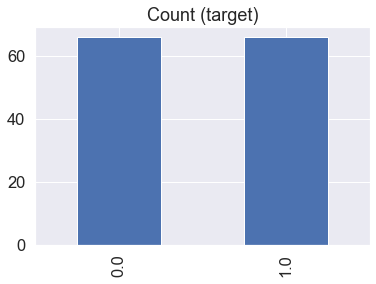

In [46]:
df_class_0_under = df_class_0.sample(count_class_1,random_state=42)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_under['Patient_Status'].value_counts())

df_under['Patient_Status'].value_counts().plot(kind='bar', title='Count (target)');

In [40]:
for col in df.select_dtypes("object"):
    print(f'{col :-<50} {df[col].unique()}')

Gender-------------------------------------------- ['FEMALE' 'MALE' nan]
Tumour_Stage-------------------------------------- ['III' 'II' 'I' nan]
Histology----------------------------------------- ['Infiltrating Ductal Carcinoma' 'Mucinous Carcinoma'
 'Infiltrating Lobular Carcinoma' nan]
ER status----------------------------------------- ['Positive' nan]
PR status----------------------------------------- ['Positive' nan]
HER2 status--------------------------------------- ['Negative' 'Positive' nan]
Surgery_type-------------------------------------- ['Modified Radical Mastectomy' 'Lumpectomy' 'Other' 'Simple Mastectomy'
 nan]
Patient_Status------------------------------------ ['Alive' 'Dead' nan]


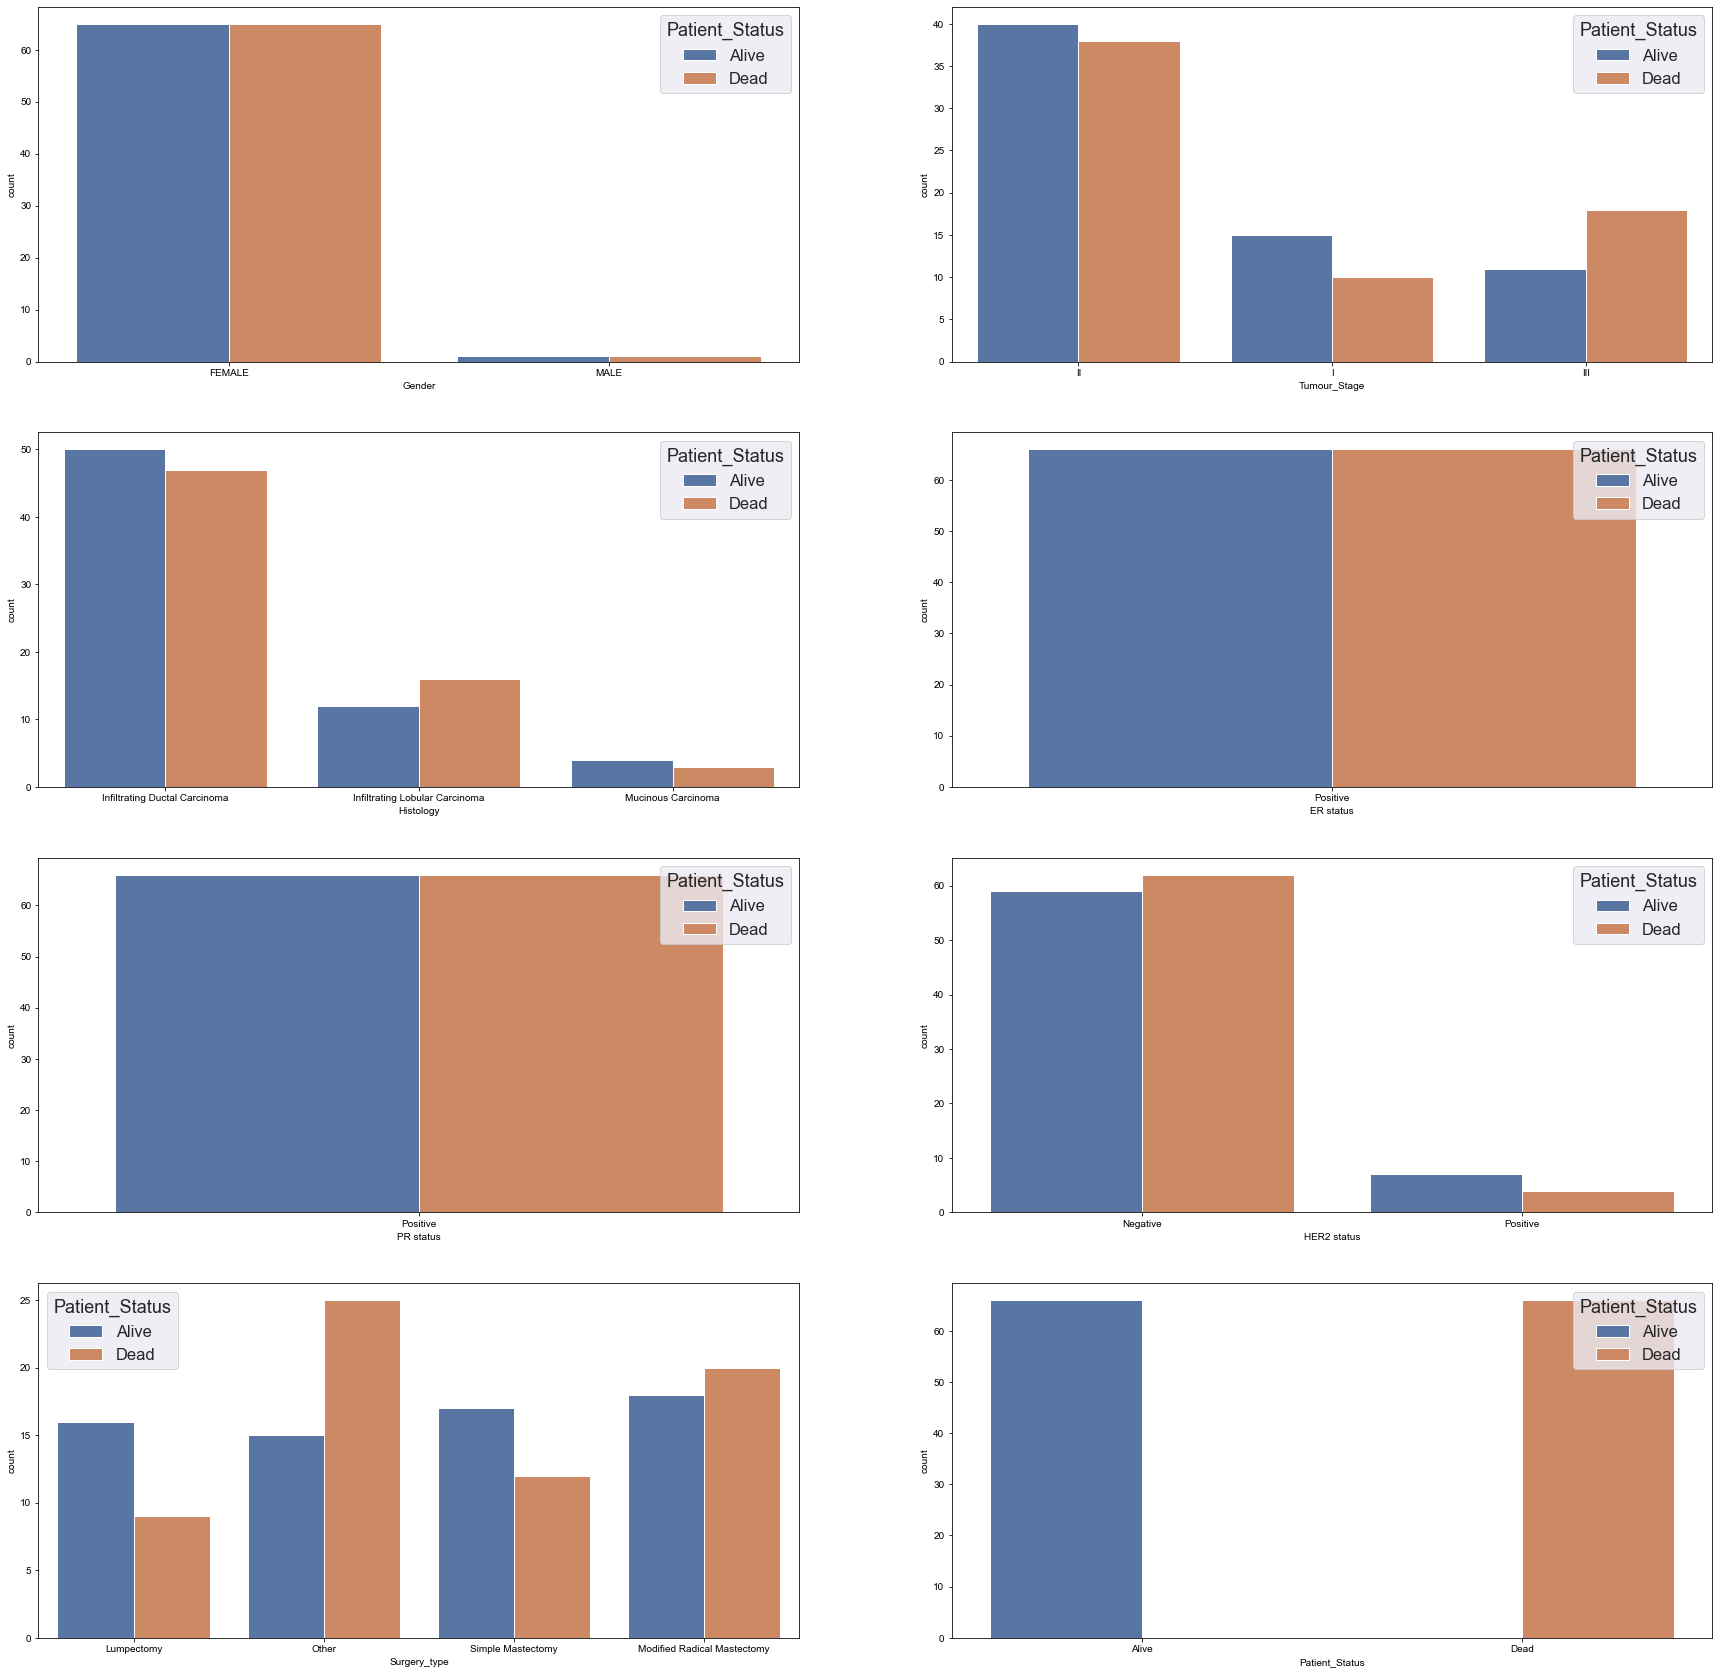

In [41]:
fig, ax = plt.subplots(4,2, figsize=(30, 30))
i=0
sns.set(font_scale = 1.5)
for col in df.select_dtypes('object'): 
    sns.countplot(df_under[col], hue=df_under['Patient_Status'], ax=ax[i//2][i%2])
    i=i+1
plt.show()

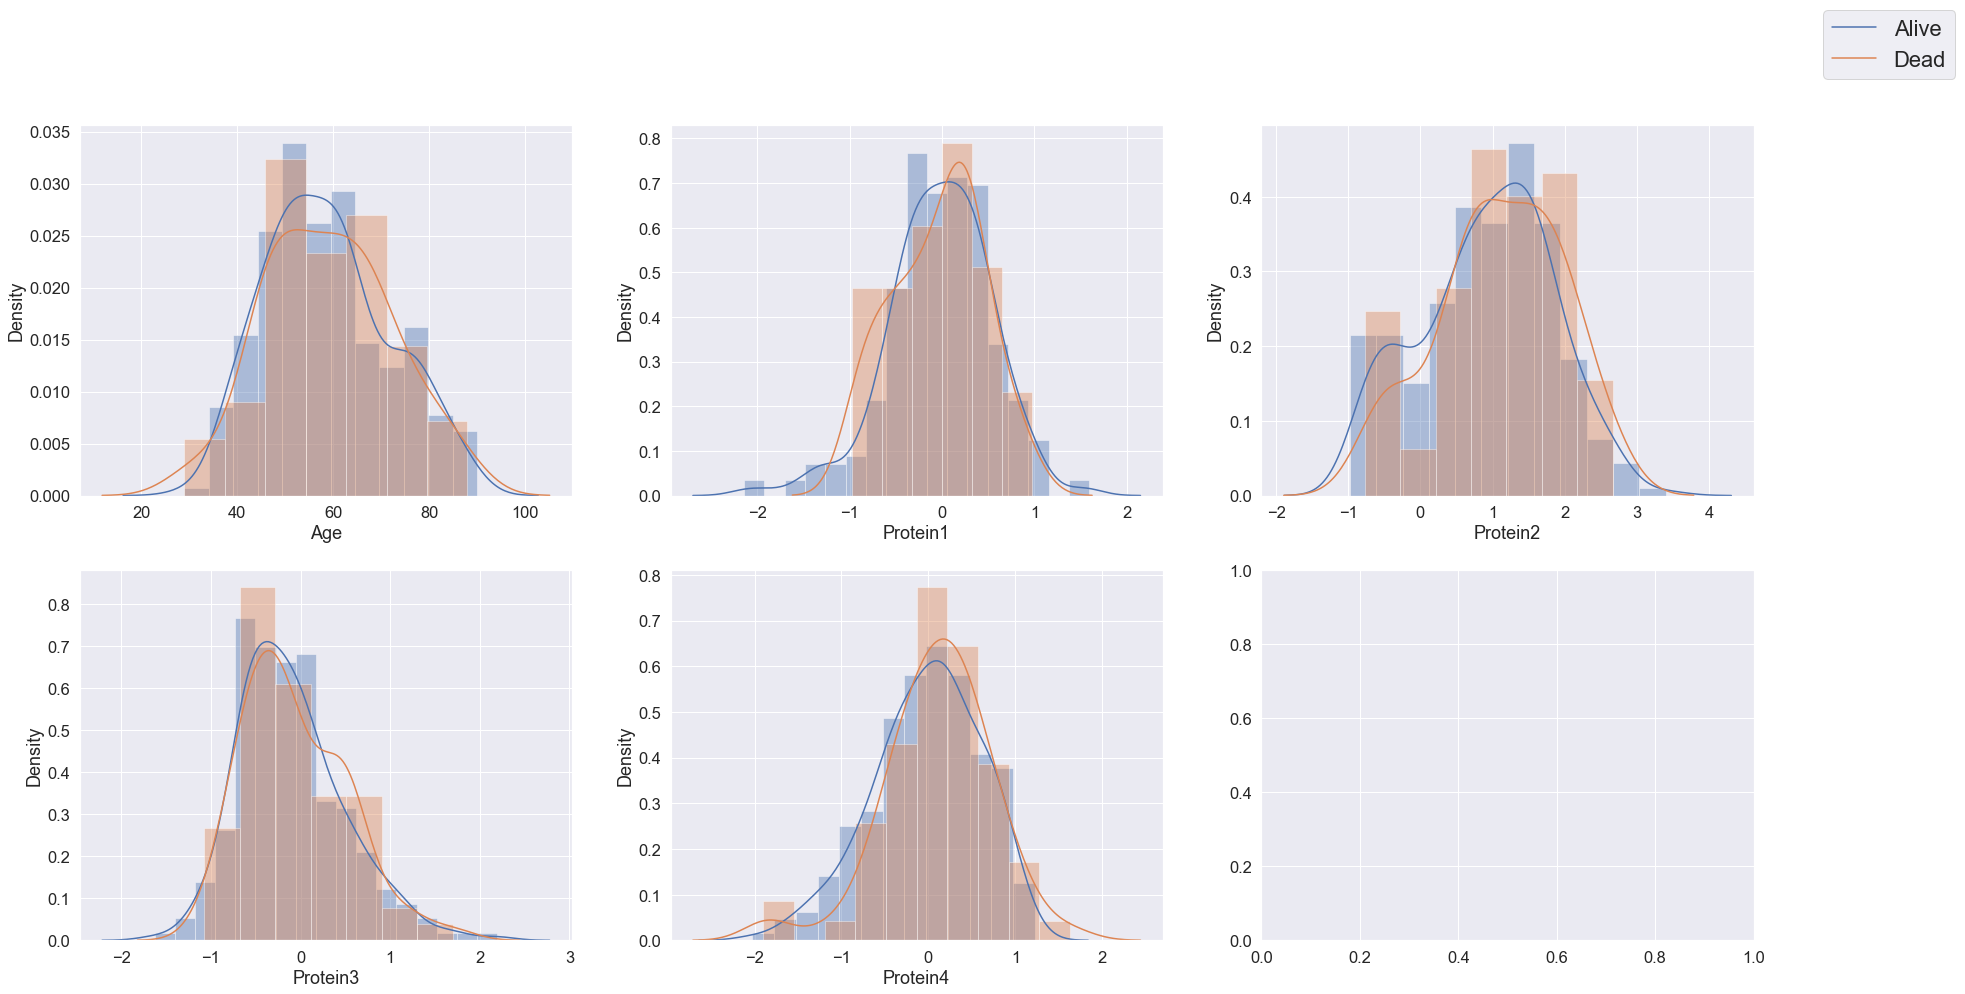

In [42]:
Alive_df = df[df['Patient_Status']=="Alive"]
Dead_df = df[df['Patient_Status']=="Dead"]
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(2,3, figsize=(30, 15))
i=0
for col in df.select_dtypes(include=['float64','int64']):
    sns.distplot(Alive_df[col],label='Alive',ax=ax[i//3][i%3])
    sns.distplot(Dead_df[col],label='Dead',ax=ax[i//3][i%3])
    i=i+1
fig.legend(labels=['Alive','Dead'],fontsize='22')
fig.show()

In [43]:
def encoding(df):
    code = {'FEMALE':0,
            'MALE':1,
            'III':3,
            'II':2,
            'I':1,
            'Infiltrating Ductal Carcinoma':0,
            'Mucinous Carcinoma':1,
            'Infiltrating Lobular Carcinoma':2,
            'Negative':0,
            'Positive':1,
            'Modified Radical Mastectomy':0,
            'Lumpectomy':1,
            'Simple Mastectomy':2,
            'Other':3,
            'Alive':1,
            'Dead':0
           }
    for col in df.select_dtypes('object'):
        df.loc[:,col]=df[col].map(code)        
    return df

def imputation(df):
    df = df.fillna(df.median())
    df = df.dropna()
    return df

def feature_engineering(df):
    useless_columns = ['Patient_ID','Date_of_Surgery','Date_of_Last_Visit','ER status','PR status']
    df = df.drop(useless_columns,axis=1)
    return df

def preprocessing(df):
    df = encoding(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('Patient_Status',axis=1)
    y = df['Patient_Status']    

    return df,X,y

In [44]:
df = data.copy()
df,X,y=preprocessing(df)

<AxesSubplot:>

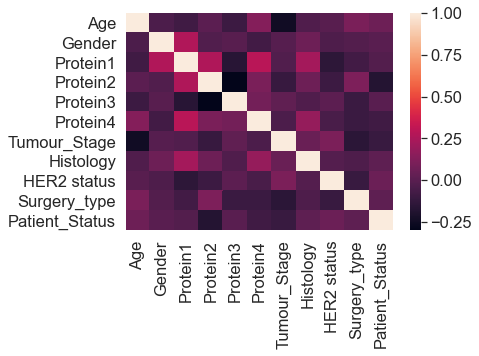

In [47]:
sns.heatmap(df_under.corr())

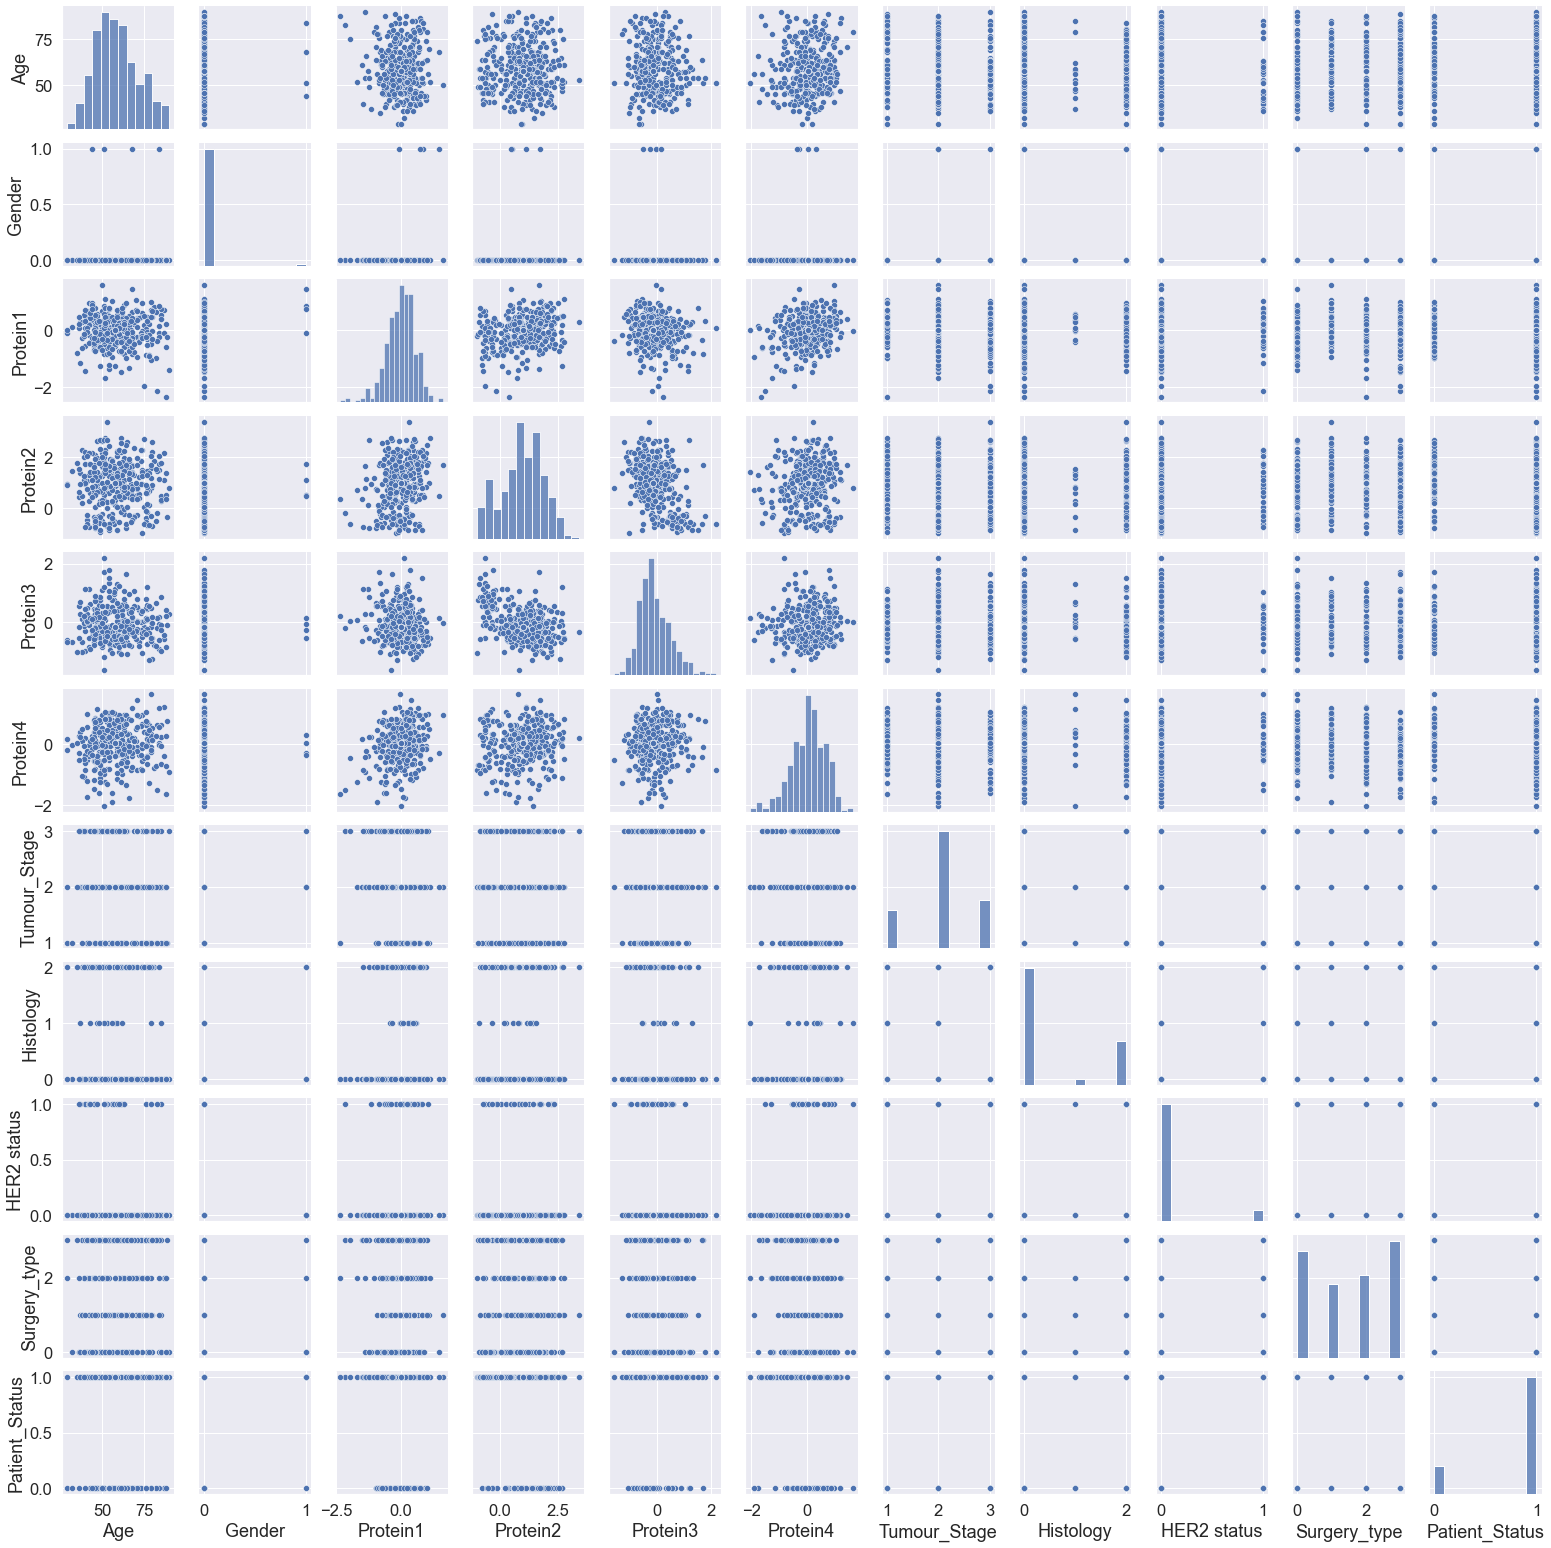

In [48]:
sns.pairplot(df, height=2)